# Introduction

In this project i attempt to create my first Neural Network. I used the MNIST Dataset from Keras to train the Neural Network

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import mnist
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Flatten
from keras.utils import to_categorical

# A. Setup

The Dataset contains 60000 Training images and 10000 Testing images and the images are from 10 classes.

I loaded the MNIST datset in training and testing variables.

The code does the following:
    
    Displays the first 10 images using Matplotlib 

    Prints the shape of the data points

    Normalizes the Data in [0,1] range.

    Converts the labels into one hot code encoding

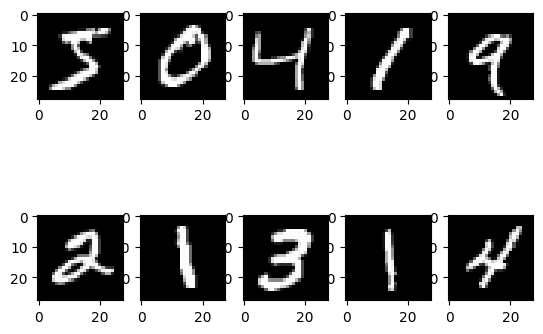

Train images shape: (60000, 28, 28)
Test images shape: (10000, 28, 28)


In [2]:
#Load Data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#Displays the Images
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_images[i], cmap='gray')
plt.show()

#Prints the shapes
print('Train images shape:', train_images.shape)
print('Test images shape:', test_images.shape)

#Normalizes the Datasets
train_images = train_images / 255.0
test_images = test_images / 255.0

#Creates the one hot code encoding for the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# B. Creating a Dense Neural Network to train on this data. 

In this section, i created a Neural Netwok based on the specifications
below.

Input Layer-> Flatten Layer that convert the image matrix to a vector

Hidden Layer->Dense Layer with 4 units and sigmoid activation

Output Layer-> Dense Layer with 10 units and softmax activation.

Print the Summary of the model at the end

In [3]:
from tensorflow.keras.layers import Input

# Creates the model
model = Sequential()

# Adds the layers
model.add(Input(shape=(28, 28)))  # Input layer
model.add(Flatten())  # Flatten layer
model.add(Dense(4, activation='sigmoid'))  # Hidden layer
model.add(Dense(10, activation='softmax'))  # Output layer

# Prints the summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,190 (12.46 KB)

 Trainable params: 3,190 (12.46 KB)

 Non-trainable params: 0 (0.00 B)

# Compiles and Run the Model

Epoch 1/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3235 - loss: 2.0794 - val_accuracy: 0.5138 - val_loss: 1.6976
Epoch 2/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5139 - loss: 1.6333 - val_accuracy: 0.5955 - val_loss: 1.4169
Epoch 3/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6027 - loss: 1.3795 - val_accuracy: 0.6660 - val_loss: 1.2147
Epoch 4/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6414 - loss: 1.2056 - val_accuracy: 0.6773 - val_loss: 1.0832
Epoch 5/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6642 - loss: 1.0987 - val_accuracy: 0.6987 - val_loss: 0.9950
Epoch 6/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6853 - loss: 1.0143 - val_accuracy: 0.7260 - val_loss: 0.9302
Epoch 7/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7114 - loss: 0.9533 - val_accuracy: 0.7340 - val_loss: 0.8761
Epoch 8/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7253 - loss: 0.9041 - val_accuracy: 0.

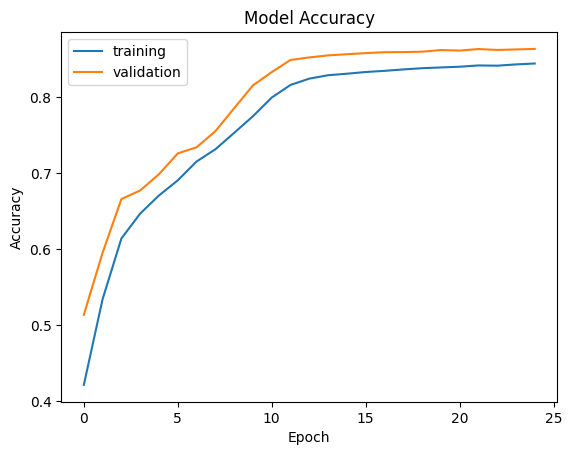

In [4]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])
history=model.fit(train_images,train_labels,batch_size=128, epochs=25, verbose= True,validation_split=0.1)
loss,accuracy=model.evaluate(test_images,test_labels,verbose=False)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training','validation'],loc='best')
plt.show

print(f'Testloss: {loss:.3}')
print(f'Accuracy: {accuracy:.3}')

# A Neural Network that will have more than 95% Training Accuracy

Here i attempt to achieve 95% training accuracy with Neural Network

Edit: I achieved 99.4% training accuracy and 98.3% validation accuracy

In [5]:
# Creates the model
model = Sequential()

# Adds the layers
model.add(Input(shape=(28, 28)))  # Input layer
model.add(Flatten())  # Input layer
model.add(Dense(128, activation='relu'))  # Hidden layer 1
model.add(Dense(64, activation='relu'))  # Hidden layer 2
model.add(Dense(10, activation='softmax'))  # Output layer

# Compiles the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Trains the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Prints the training accuracy
print('Training accuracy:', history.history['accuracy'][-1])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8798 - loss: 0.4249 - val_accuracy: 0.9643 - val_loss: 0.1167
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9685 - loss: 0.1019 - val_accuracy: 0.9714 - val_loss: 0.0909
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9773 - loss: 0.0741 - val_accuracy: 0.9727 - val_loss: 0.0833
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9835 - loss: 0.0521 - val_accuracy: 0.9799 - val_loss: 0.0682
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9874 - loss: 0.0397 - val_accuracy: 0.9771 - val_loss: 0.0786
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9901 - loss: 0.0310 - val_accuracy: 0.9759 - val_loss: 0.0855
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9916 - loss: 0.0248 - val_accuracy: 0.9749 - val_loss: 0.0884
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9926 - loss: 0.0220 -

# Compile the Model again

Epoch 1/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9981 - loss: 0.0070 - val_accuracy: 0.9982 - val_loss: 0.0068
Epoch 2/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9989 - loss: 0.0037 - val_accuracy: 0.9972 - val_loss: 0.0078
Epoch 3/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9990 - loss: 0.0035 - val_accuracy: 0.9980 - val_loss: 0.0080
Epoch 4/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 0.9987 - val_loss: 0.0055
Epoch 5/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9999 - loss: 4.6491e-04 - val_accuracy: 0.9988 - val_loss: 0.0054
Epoch 6/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 1.0000 - loss: 3.4985e-04 - val_accuracy: 0.9910 - val_loss: 0.0316
Epoch 7/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9944 - loss: 0.0170 - val_accuracy: 0.9955 - val_loss: 0.0166
Epoch 8/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9989 - loss: 0.0035 - val_accu

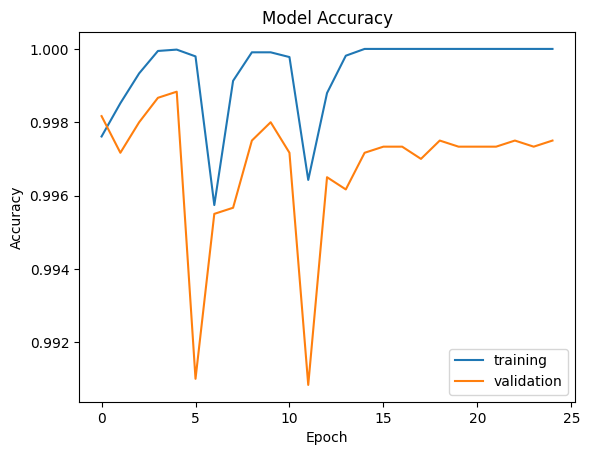

In [6]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])
history=model.fit(train_images,train_labels,batch_size=128, epochs=25, verbose= True,validation_split=0.1)
loss,accuracy=model.evaluate(test_images,test_labels,verbose=False)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training','validation'],loc='best')
plt.show

print(f'Testloss: {loss:.3}')
print(f'Accuracy: {accuracy:.3}')

# C: Using Convolutions instead of all Dense Layers to train on Dataset    

Using the Dense Layer model, I achieved around 84% Accuracy. I'll now see if
Convolution Layers can help me improve the model.
Here i created a Neural Network model which will use Convolutional Layers to Learn
about the data. 

My aim is to acheive a Training Accuracy of 90% 

Edit: i achieved 97.6% training accuracy and 98.9% validation accuracy

In [7]:
from keras.layers import Dropout

# Reshape the data to include the channel dimension
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

# Create the model
model = Sequential()

# Add the layers
model.add(Input(shape=(28, 28, 1)))  # Input layer
model.add(Conv2D(32, (3, 3), activation='relu'))  # Convolutional layer
model.add(MaxPooling2D((2, 2)))  # Pooling layer
model.add(Dropout(0.25))  # Dropout layer
model.add(Flatten())  # Flatten layer
model.add(Dense(64, activation='relu'))  # Dense layer
model.add(Dropout(0.5))  # Dropout layer
model.add(Dense(10, activation='softmax'))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Print the training accuracy
print('Training accuracy:', history.history['accuracy'][-1])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.8156 - loss: 0.5890 - val_accuracy: 0.9720 - val_loss: 0.0921
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9458 - loss: 0.1839 - val_accuracy: 0.9793 - val_loss: 0.0656
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9560 - loss: 0.1477 - val_accuracy: 0.9819 - val_loss: 0.0582
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9612 - loss: 0.1282 - val_accuracy: 0.9827 - val_loss: 0.0518
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9668 - loss: 0.1081 - val_accuracy: 0.9841 - val_loss: 0.0485
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9701 - loss: 0.0949 - val_accuracy: 0.9859 - val_loss: 0.0433
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9722 - loss: 0.0894 - val_accuracy: 0.9868 - val_loss: 0.0429
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9736 - loss: 

# Compile the Convolutional Neural Netowrk

Epoch 1/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9788 - loss: 0.0669 - val_accuracy: 0.9952 - val_loss: 0.0156
Epoch 2/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9814 - loss: 0.0575 - val_accuracy: 0.9952 - val_loss: 0.0156
Epoch 3/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9811 - loss: 0.0561 - val_accuracy: 0.9943 - val_loss: 0.0174
Epoch 4/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9829 - loss: 0.0524 - val_accuracy: 0.9940 - val_loss: 0.0186
Epoch 5/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9846 - loss: 0.0483 - val_accuracy: 0.9937 - val_loss: 0.0198
Epoch 6/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9846 - loss: 0.0473 - val_accuracy: 0.9938 - val_loss: 0.0197
Epoch 7/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9835 - loss: 0.0508 - val_accuracy: 0.9940 - val_loss: 0.0224
Epoch 8/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9840 - loss: 0.0461 - val_accu

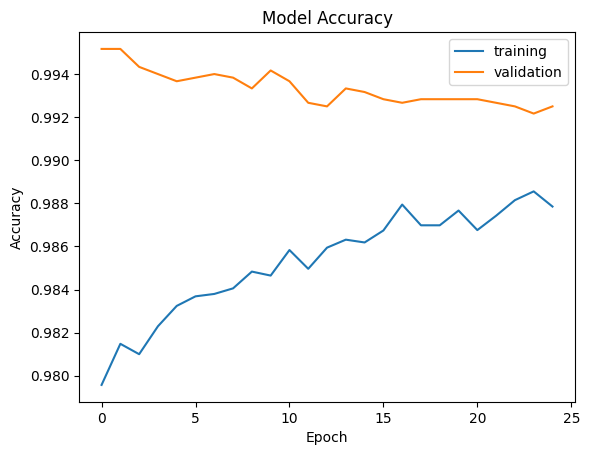

In [8]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])
history=model.fit(train_images,train_labels,batch_size=128, epochs=25, verbose= True,validation_split=0.1)
loss,accuracy=model.evaluate(test_images,test_labels,verbose=False)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training','validation'],loc='best')
plt.show

print(f'Testloss: {loss:.3}')
print(f'Accuracy: {accuracy:.3}')